## Regularization

**Regularization** is a very important tool for improving the performance of ANNs. Regularization helps to reduce the overfit and variance of models. Helps to get better test set performance. For Neural networks there are two most popular **Regularization** techniques, **L_2** regularization and **Dropout** regularization. In this notebook we will use both of these techniques in **TensorFlow**.

**Dropout** paper: https://arxiv.org/abs/1207.0580

In [1]:
#Do regular imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
#Get MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
#Lets build a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Dense(196, activation='relu'),
  tf.keras.layers.Dense(98, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1983 - accuracy: 0.9403 - val_loss: 0.1195 - val_accuracy: 0.9623
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9729 - val_loss: 0.0928 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0712 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0932 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.0797 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0746 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0930 - val_accuracy:

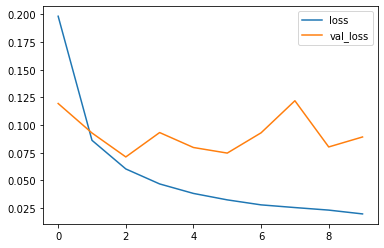

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

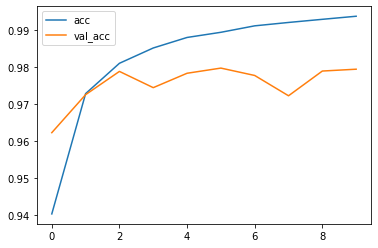

In [6]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9795
[0.08920613676309586, 0.9794999957084656]


In [8]:
# Now lets apply an L2 regularization to first dense layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(392, activation='relu', kernel_regularizer='l2'),
  tf.keras.layers.Dense(196, activation='relu'),
  tf.keras.layers.Dense(98, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5895 - accuracy: 0.9136 - val_loss: 0.3349 - val_accuracy: 0.9435
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3213 - accuracy: 0.9443 - val_loss: 0.2745 - val_accuracy: 0.9551
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2730 - accuracy: 0.9529 - val_loss: 0.2686 - val_accuracy: 0.9514
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2494 - accuracy: 0.9552 - val_loss: 0.2377 - val_accuracy: 0.9573
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2330 - accuracy: 0.9589 - val_loss: 0.2169 - val_accuracy: 0.9621
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2236 - accuracy: 0.9597 - val_loss: 0.2263 - val_accuracy: 0.9597
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2176 - accuracy: 0.9614 - val_loss: 0.1944 - val_accuracy:

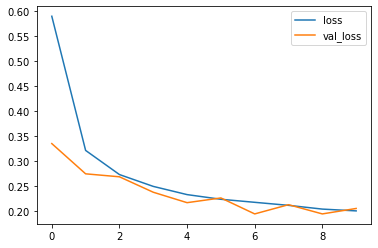

In [10]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

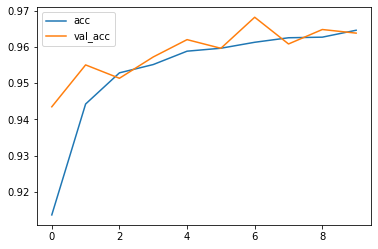

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

We can see from above after a little bit of regularization dev and train set accuracies are very similar.

In [12]:
#Lets try now Dropout regularization - we have applied two dropout layers after Dense layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(196, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(98, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3281 - accuracy: 0.9009 - val_loss: 0.1219 - val_accuracy: 0.9620
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1697 - accuracy: 0.9493 - val_loss: 0.1123 - val_accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1386 - accuracy: 0.9592 - val_loss: 0.0882 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 0.0872 - val_accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1052 - accuracy: 0.9682 - val_loss: 0.0963 - val_accuracy: 0.9722
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0988 - accuracy: 0.9712 - val_loss: 0.0865 - val_accuracy: 0.9757
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0905 - accuracy: 0.9732 - val_loss: 0.0756 - val_accurac

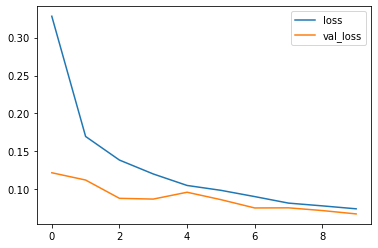

In [14]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

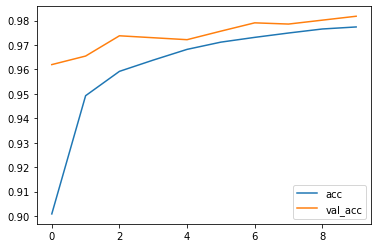

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

We have very nice validation and train set accuracies now.